<a href="https://colab.research.google.com/github/NAXE22/machine-learning/blob/main/CHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/Dataset/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Exploratory Data Visualization** -
Before creating the model, I will perform some exploratory data visualization, to get some insights on the data. As mentioned above, there are many risk factors such as smoking and high cholesterol levels that were found by the Framingham Heart Study to increase 10 year risk of CHD. I will take a look at some of these risk factors, and see if I can find these relationships in this dataset.

First, I will create a count plot of the variable 'education,' in order to get a better understanding on the level of education of the participants.

<ipython-input-12-ea95e4de9d3e>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


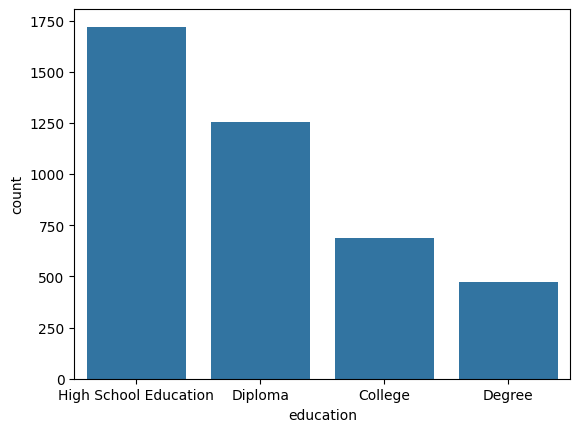

In [12]:
ax=sns.countplot(x='education',data=df)
new_labels=['High School Education', 'Diploma', 'College', 'Degree']
ax.set_xticklabels(new_labels)
plt.show()

Most participants seem to have  high school education. A few  of them have a diploma or went to college, and very few have a degree.

Now, I will look into some risk factors. In the year 1960, smoking was said to increase the risk of CHD. I will try to visualize this relationship.

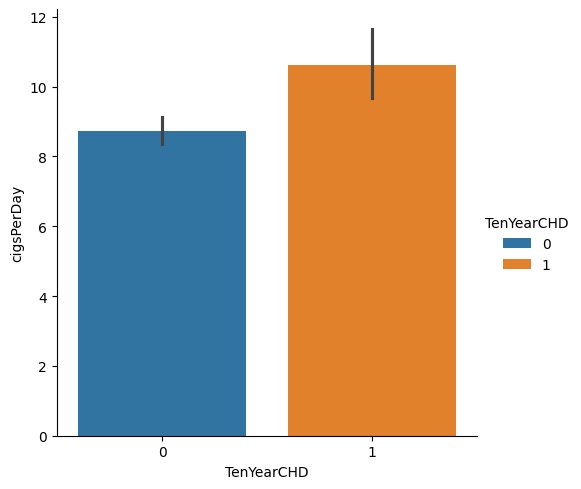

In [13]:
sns.catplot(x='TenYearCHD',y='cigsPerDay',kind='bar',data=df,hue='TenYearCHD')

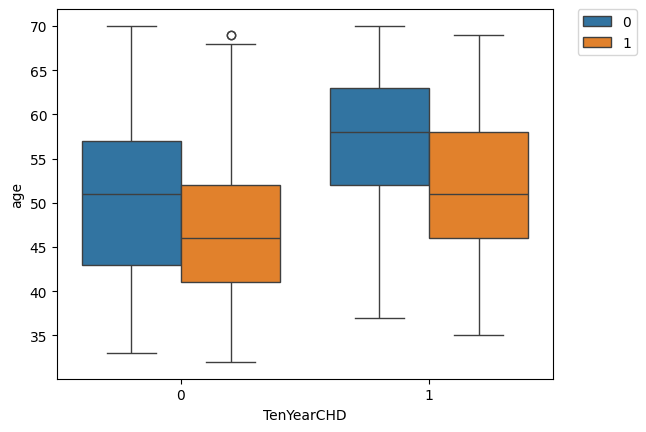

In [14]:
sns.boxplot(x='TenYearCHD',y='age',hue='currentSmoker',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

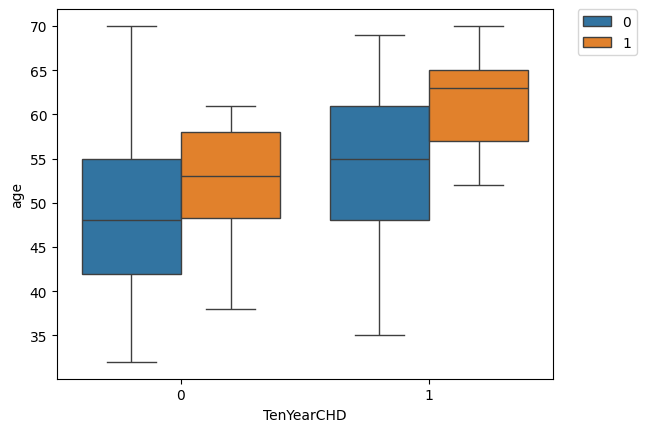

In [15]:
sns.boxplot(x='TenYearCHD',y='age',hue='prevalentStroke',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

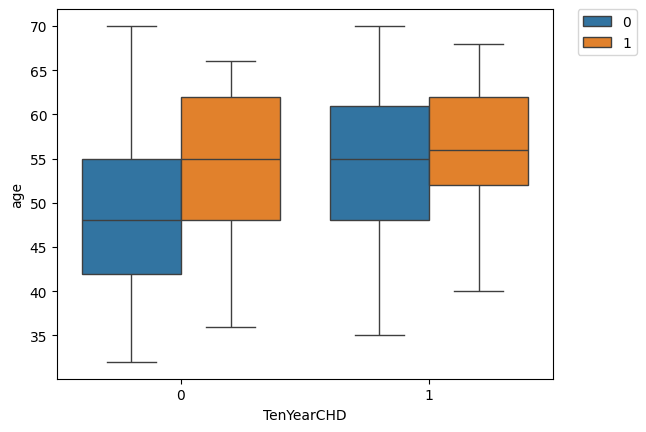

In [16]:
sns.boxplot(x='TenYearCHD',y='age',hue='diabetes',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(80.0, 725.45)

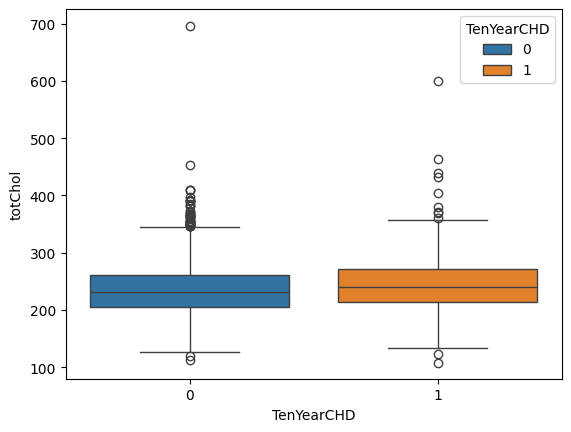

In [17]:
sns.boxplot(x='TenYearCHD',y='totChol',data=df,hue='TenYearCHD')
plt.ylim(80)

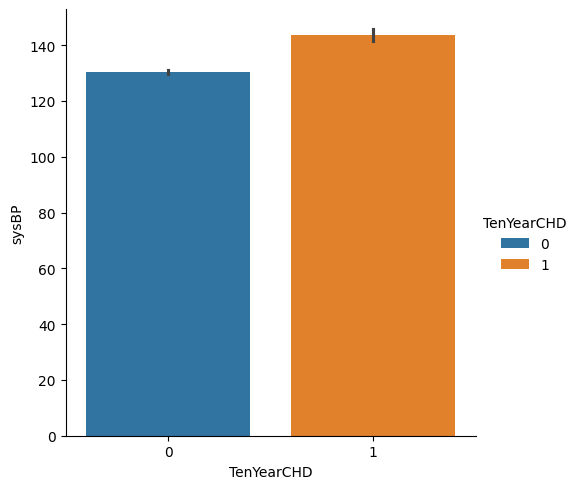

In [18]:
sns.catplot(x='TenYearCHD',y='sysBP',kind='bar',data=df,hue='TenYearCHD')

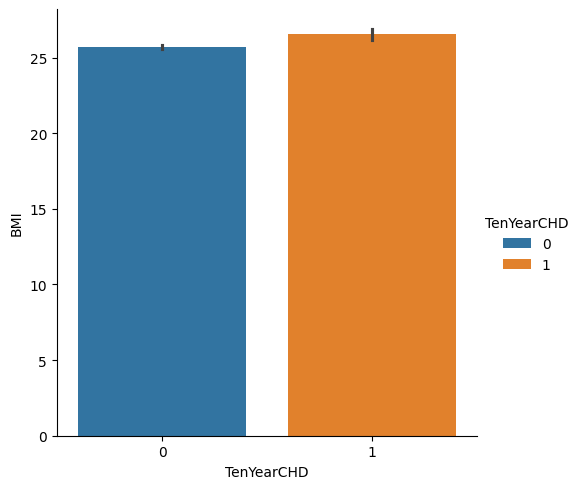

In [19]:
sns.catplot(x='TenYearCHD',y='BMI',kind='bar',data=df,hue='TenYearCHD')

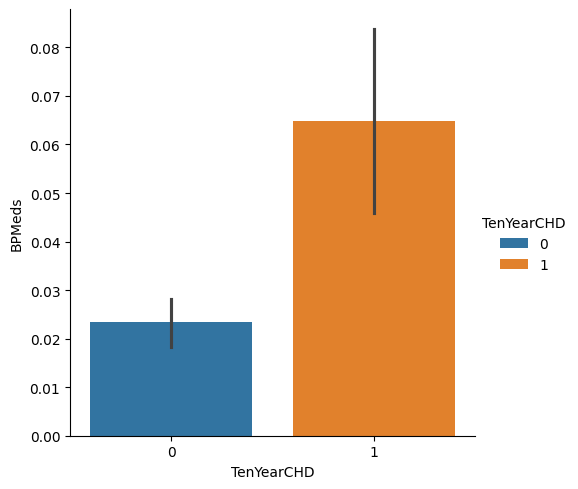

In [20]:
sns.catplot(x='TenYearCHD',y='BPMeds',kind='bar',data=df,hue='TenYearCHD')

ow that I have explored the data set, I will do some preprocessing before creating the model.

In [21]:
df.isnull().any()
df=df.dropna()
df.isnull().any()

,0
male,False
age,False
education,False
currentSmoker,False
cigsPerDay,False
BPMeds,False
prevalentStroke,False
prevalentHyp,False
diabetes,False
totChol,False


In [22]:
# checking baseline accuracy

df['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3101
1,557


In [23]:
baseline_accuracy=3101/(3101+557)
print(baseline_accuracy)

0.8477310005467469


the model should beat the baseline accuracy of 0.84

In [24]:
import imblearn
import imblearn.over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

since the dataset is heavily imbalnced , we have to balanc eit to avid bias in the model .here i'm using SMOTE (Synthetic Minority Over-sampling Technique): This generates synthetic samples by interpolating between existing samples of the minority class

In [25]:
X=df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']


#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print(f"Original dataset shape: {y_train.value_counts()}")
print(f"Resampled dataset shape: {y_res.value_counts()}")

Original dataset shape: TenYearCHD
0    2179
1     381
Name: count, dtype: int64
Resampled dataset shape: TenYearCHD
0    2179
1    2179
Name: count, dtype: int64


In [26]:
pipeline = Pipeline([
    ('smote', smote),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
pipeline.fit(X_res,y_res)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [27]:
pipe_pred=pipeline.predict(X_test)
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pipe_pred))


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       922
           1       0.22      0.26      0.24       176

    accuracy                           0.74      1098
   macro avg       0.54      0.54      0.54      1098
weighted avg       0.75      0.74      0.74      1098



In [28]:
accuracy_score(y_test,pipe_pred)

0.7358834244080146

In [29]:
# since smot can't beta baseline accuracy,trying with over sampling and undersampling
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.35)
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [30]:
pipeline.fit(X_train,y_train)
pipe_pred = pipeline.predict(X_test)
print(classification_report(y_test,pipe_pred))
print(accuracy_score(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1072
           1       0.85      0.97      0.91      1099

    accuracy                           0.90      2171
   macro avg       0.91      0.90      0.90      2171
weighted avg       0.91      0.90      0.90      2171

0.9023491478581299


the model has a precison of 0.9 .this beats the baseline accuracy of 0.85